## The anisotropy function and the likelihood plots.

In [10]:
from I3Tray import *
from icecube import icetray, dataclasses, phys_services, sim_services, dataio,  earthmodel_service, neutrino_generator, tableio, hdfwriter
from icecube.simprod import segments
from icecube.icetray import I3Units, I3Frame
from icecube.dataclasses import I3Particle
from icecube.simclasses import I3MMCTrack
from icecube.icetray import I3Units, OMKey, I3Frame
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import sys, os
import math
from os import path
from scipy import stats
from scipy.stats import norm
import scipy.special as sp

### The anisotropy function (skewed von-Mises):

In [8]:
dotpro=[]
for i in range(0,950):
    if path.exists("/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco14.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco61.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco106.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco133.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco172.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco208.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco235.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco369.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco371.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco377.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco390.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco395.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco401.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco665.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco686.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco963.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
        
            gcd = dataio.I3File('/home/users/kaustav/pone_offline/GCD/PONE_Phase1.i3.gz') #GCD file for the position of DOMs
            frame_geodoms=gcd.pop_frame()
            geodoms=frame_geodoms['I3Geometry'].omgeo

            for frame in infile:   
                MMCTrackList = frame['MMCTrackList']
                secondary=MMCTrackList[0].GetI3Particle()   #Getting the starting position of charged lepton
                pulseseriesmap=frame['I3Photons_PMTResponse']
                for dom in pulseseriesmap.keys() :
                    domkey =  OMKey(dom.string, dom.om, 0) 
                    weight=anisotropy(MMCTrackList,secondary,pulseseriesmap,geodoms,domkey)
                    print(weight)

258.6959449481423
368.818682270847
424.8999769098515
465.2117206050634
501.77472238160897
512.6459434330372
322.19804663254587
413.2160333076478
539.3411366693182
514.9055472319363
285.0642905877194
401.3983316095715
511.7389855351667
554.3500418397921
567.5576928548312
569.4834202476874
559.1784973887143
563.5372207374236
525.4116008994122
460.72864468493384
379.6326584390413
567.9479457250718
569.1906831273275
568.2068688107871
549.8317315060689
289.36590478274877
225.46501767994303
468.72987879570104
477.57523854298313
484.18852258468297
506.78623029732785
527.5330846101691
558.1270285146674
561.8114240447907
454.4178001512974
278.1760185235881
544.4068663134657
520.2246334040072
523.5047192796901
561.6540581264742
566.3898314545174
62.43837587377505
482.81075633922404
475.9194691027524
114.84248994359433
352.69032442210306
507.1449255403678
568.6667893613194
549.9716187218912
503.26751073086336
456.4007315196312
31.134430154274536
73.57190392088025
227.69264759334845
466.7651427639

In [7]:
def anisotropy(MMCTrackList,secondary,pulseseriesmap,geodoms,domkey):
    sigma=1.3
    alpha=0.2
    theta_c=0.2
    amp=5
    L=456.65
    pulseseriesmap=frame['I3Photons_PMTResponse']
    x1=-(secondary.pos.x-geodoms[domkey].position.x)
    y1=-(secondary.pos.y-geodoms[domkey].position.y)
    z1=-(secondary.pos.z-geodoms[domkey].position.z)
    r1= math.sqrt(x1*x1+y1*y1+z1*z1)
    x2=np.sin(secondary.dir.theta)*np.cos(secondary.dir.phi)
    y2=np.sin(secondary.dir.theta)*np.sin(secondary.dir.phi)
    z2=np.cos(secondary.dir.theta)
    zeta=np.arccos((x1*x2+y1*y2+z1*z2)/r1)
    weight= amp*np.exp(((sigma*alpha/theta_c)**2)*np.cos(zeta - theta_c))*(1 + L*np.sin(zeta))/(2*np.pi*sp.iv(0,(sigma*alpha/theta_c)**2))
    return weight

### Cascade fitter (after implementing anisotropy):

In [11]:
def frame_absent(run_num):
    if (run_num==6 or run_num==14 or run_num==36 or run_num==41 or run_num==49 or run_num==54 or run_num==59 or run_num==61 or run_num==76 or run_num==80 or run_num==82 or run_num==106 or run_num==131 or run_num==133 
        or run_num==149 or run_num==155 or run_num==172 or run_num==176 or run_num==189 or run_num==193 or run_num==198 or run_num==208 or run_num==214 or run_num==216
        or run_num==223 or run_num==235 or run_num==238 or run_num==252 or run_num==284 or run_num==288 or run_num==311 or run_num==369 or run_num==371 or run_num==377 or run_num==379 or run_num==378 or run_num==385 or run_num==389 or run_num==390 
        or run_num==391 or run_num==392 or run_num==393 or run_num==397 or run_num==594
        or run_num==395 or run_num==399 or run_num==401 or run_num==403 or run_num==419 or run_num==471 or run_num==521 or run_num==522 or run_num==550 or run_num==538 or run_num==574 or 
        run_num==584 or run_num==569 or run_num==643 or run_num==646 or run_num==647 or run_num==648 
        or run_num==650 or run_num==656 or run_num==657
        or run_num==658 or run_num==659 or run_num==665 or run_num==675 or run_num==683 or run_num==685 or run_num==686 or run_num==708 or run_num==711
        or run_num==714 or run_num==726 or run_num==737 or run_num==835 or run_num==873 or run_num==889 or run_num==746 or run_num==837 or run_num==867 or run_num==878 or run_num==917 or run_num==944 or run_num==949 or run_num==954 or run_num==963 or run_num==971
        or run_num==972 or run_num==895 or run_num==984 or run_num==987 or run_num==988 or run_num==989):
        return True
    else:
        return False

In [12]:
nloglike_cascade_nue_aniso=[]
nloglike_cascade_nutau_aniso=[]
nloglike_track_numu_aniso=[]
nfitparameters_llhfit=5
nfitparameters_nutau=4
events_nue=0
events_nutau=0
events_numu=0
for i in range(0,950):
    print("File:",i)
    if path.exists("/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst"
    if path.exists("/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst"
        if(frame_absent(i)==False):           
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            count=0
            for frame in infile:
                count=count+1      #all frames are not working. So will work with a limited number of frames per file.
                if(count<=100):
                    pulses=0
                    pulseseriesmap=frame['I3Photons_PMTResponse']
                    for omkey in pulseseriesmap.keys():
                        for pulse in pulseseriesmap[omkey]:
                            pulses=pulses+1
                    if(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
                        events_nutau=events_nutau+1
                        nloglike_cascade_nutau_aniso.append((frame['NuTau_nloglike'].value)/(pulses-nfitparameters_nutau))                
                    elif(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
                        events_nue=events_nue+1
                        nloglike_cascade_nue_aniso.append((frame['NuTau_nloglike'].value)/(pulses-nfitparameters_nutau))
                    elif(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):   
                        events_numu=events_numu+1
                        nloglike_track_numu_aniso.append((frame['llhfit_nloglike'].value)/(pulses-nfitparameters_llhfit))
                else:
                    break
    else:
        continue
print(events_nutau)
print(events_nue)
print(events_numu)

File: 0
File: 1
File: 2
File: 3
File: 4
File: 5
File: 6
File: 7
File: 8
File: 9
File: 10
File: 11
File: 12
File: 13
File: 14
File: 15
File: 16
File: 17
File: 18
File: 19
File: 20
File: 21
File: 22
File: 23
File: 24
File: 25
File: 26
File: 27
File: 28
File: 29
File: 30
File: 31
File: 32
File: 33
File: 34
File: 35
File: 36
File: 37
File: 38
File: 39
File: 40
File: 41
File: 42
File: 43
File: 44
File: 45
File: 46
File: 47
File: 48
File: 49
File: 50
File: 51
File: 52
File: 53
File: 54
File: 55
File: 56
File: 57
File: 58
File: 59
File: 60
File: 61
File: 62
File: 63
File: 64
File: 65
File: 66
File: 67
File: 68
File: 69
File: 70
File: 71
File: 72
File: 73
File: 74
File: 75
File: 76
File: 77
File: 78
File: 79
File: 80
File: 81
File: 82
File: 83
File: 84
File: 85
File: 86
File: 87
File: 88
File: 89
File: 90
File: 91
File: 92
File: 93
File: 94
File: 95
File: 96
File: 97
File: 98
File: 99
File: 100
File: 101
File: 102
File: 103
File: 104
File: 105
File: 106
File: 107
File: 108
File: 109
File: 110


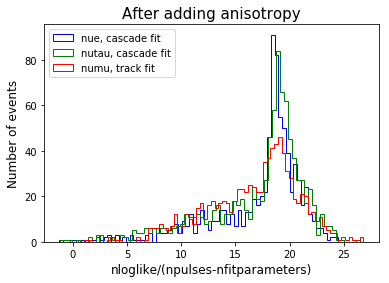

In [13]:
plt.hist(nloglike_cascade_nue_aniso, bins=75, histtype='step',label='nue, cascade fit',color='blue')
plt.hist(nloglike_cascade_nutau_aniso, bins=75, histtype='step',label='nutau, cascade fit',color='green')
plt.hist(nloglike_track_numu_aniso, bins=75, histtype='step',label='numu, track fit',color='red')
plt.xlabel('nloglike/(npulses-nfitparameters)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("After adding anisotropy",fontsize=15)
#plt.xlim(-1000,10000)
plt.legend(loc='upper left')
plt.show()

### Cascade fitter (before implementing anisotropy):

In [14]:
nloglike_cascade_nue=[]
nloglike_cascade_nutau=[]
nloglike_track_numu=[]
nfitparameters_llhfit=5
nfitparameters_nutau=4
events_nue=0
events_nutau=0
events_numu=0
for i in range(0,950):
    #print("File",i)
    if path.exists("/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if(frame_absent(i)==False):  
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            count=0
            for frame in infile:
                count=count+1      #all frames are not working. So will work with a limited number of frames per file.
                if(count<=100):
                    #events=events+1
                    pulses=0
                    pulseseriesmap=frame['I3Photons_PMTResponse']
                    for omkey in pulseseriesmap.keys():
                        for pulse in pulseseriesmap[omkey]:
                            pulses=pulses+1
                    if(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
                        events_nutau=events_nutau+1
                        nloglike_cascade_nutau.append((frame['NuTau_nloglike'].value)/(pulses-nfitparameters_nutau))                
                    elif(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
                        events_nue=events_nue+1
                        nloglike_cascade_nue.append((frame['NuTau_nloglike'].value)/(pulses-nfitparameters_nutau))
                    elif(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):      
                        events_numu=events_numu+1
                        nloglike_track_numu.append((frame['llhfit_nloglike'].value)/(pulses-nfitparameters_llhfit))
                else:
                    break
    else:
        continue
print(events_nutau)
print(events_nue)

935
864


In [17]:
print(events_numu)

1015


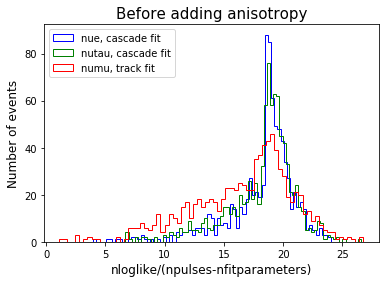

In [15]:
plt.hist(nloglike_cascade_nue, bins=75, histtype='step',label='nue, cascade fit',color='blue')
plt.hist(nloglike_cascade_nutau, bins=75, histtype='step',label='nutau, cascade fit',color='green')
plt.hist(nloglike_track_numu_aniso, bins=75, histtype='step',label='numu, track fit',color='red')
plt.xlabel('nloglike/(npulses-nfitparameters)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Before adding anisotropy",fontsize=15)
#plt.xlim(-1000,10000)
plt.legend(loc='upper left')
plt.show()

### Comparison: Before and after adding anisotropy...

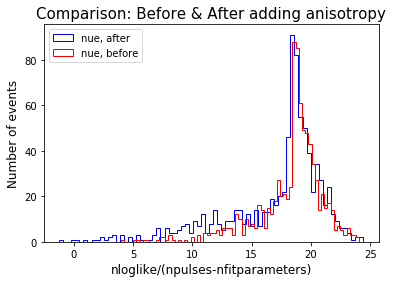

In [16]:
plt.hist(nloglike_cascade_nue_aniso, bins=75, histtype='step',label='nue, after',color='blue')
plt.hist(nloglike_cascade_nue, bins=75, histtype='step',label='nue, before',color='red')
plt.xlabel('nloglike/(npulses-nfitparameters)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Comparison: Before & After adding anisotropy",fontsize=15)
#plt.xlim(-1000,10000)
plt.legend(loc='upper left')
plt.show()

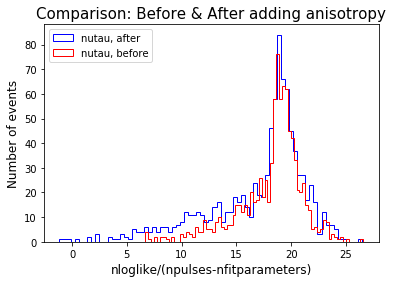

In [17]:
plt.hist(nloglike_cascade_nutau_aniso, bins=75, histtype='step',label='nutau, after',color='blue')
plt.hist(nloglike_cascade_nutau, bins=75, histtype='step',label='nutau, before',color='red')
plt.xlabel('nloglike/(npulses-nfitparameters)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Comparison: Before & After adding anisotropy",fontsize=15)
#plt.xlim(-1000,10000)
plt.legend(loc='upper left')
plt.show()